# Machine Learning algorithms
We will apply two machine learning algorithms : Random Forest classifiers and K Means Clustering algorithm. 

#### Importing Libraries

In [2]:
import os
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

#### Loading dataset

In [8]:
df = pd.read_csv('../data/imputed_decoded_dataset.csv')
df.head()

,Unnamed: 0,YearlyCompensation,Age,Gender,Location,JobTitle,CompanyName,Description,PayPeriod,SalaryMin,...,MLIncorporation,CoursesCoursera,MLExperienceYears,Education,DataScienceTeamSize,CompanySize,Industry,PrimaryToolSelected,RemoteFriendly,SalaryMedian
0,2353.0,"2,000-2,999",25-29,Female,Los Angeles Metropolitan Area,Administrative Assistant,Confidential,Administrative Assistant - Leading Real Estate...,YEARLY,70000.000,...,We are exploring ML methods (and may one day p...,Coursera,3-4 years,Doctoral degree,1-2,Large,Entertainment,"Business intelligence software (Salesforce, Ta...",No,98161.557774
1,418.0,"2,000-2,999",25-29,Female,"Detroit, MI",2024 Summer Audit Information Technology Inter...,Comerica Bank,"Location(s):\n\nFarmington Hills, MI or Auburn...",MONTHLY,30275.198,...,We are exploring ML methods (and may one day p...,Coursera,3-4 years,Doctoral degree,1-2,Large,Entertainment,"Business intelligence software (Salesforce, Ta...",No,98161.557774
2,621.0,"2,000-2,999",25-29,Female,"Morrisville, NC",5G System Architect Sr Principal Software Deve...,Oracle,Job Description\n\nGroup Description\n\nThe Or...,YEARLY,96800.000,...,We are exploring ML methods (and may one day p...,Coursera,3-4 years,Doctoral degree,1-2,Medium,Retail,"Business intelligence software (Salesforce, Ta...",No,100614.164708
3,5032.0,"2,000-2,999",25-29,Female,"Jonesboro, AR",Associate Team Leader,H&R Block,What You'll Bring To The Team...\n\nSupport th...,YEARLY,74626.160,...,We are exploring ML methods (and may one day p...,Coursera,3-4 years,Doctoral degree,1-2,Large,Entertainment,"Business intelligence software (Salesforce, Ta...",No,98161.557774
4,11616.0,"2,000-2,999",25-29,Female,"Fort Myers, FL",Collections Specialist,Rang Technologies Inc,Title: Collections Specialist Location: 13200 ...,YEARLY,123200.000,...,We are exploring ML methods (and may one day p...,Coursera,3-4 years,Doctoral degree,1-2,Large,Entertainment,"Business intelligence software (Salesforce, Ta...",No,98161.557774


In [4]:
with open('../preprocessing/column_names.txt', 'w') as write_file:
    for column in df.columns:
        write_file.write(f"{column}\n")

## Question 1 Solution
How effective are online learning platforms in improving job market readiness compared to traditional university degrees ?


### Hypothesis 1 Solution
People who learn from online platforms like Coursera, in addition to traditional degrees, have higher salaries and job placement rates in their respective fields.

#### Preprocessing dataset

In [22]:
# Define relevant features for a comprehensive model
features = [
    'Education', 
    'ExperienceLevel', 
    'CoursesCoursera', 
    'JobTitle', 
    'CompanySize', 
    'DataScienceTeamSize', 
    'MLIncorporation', 
    'PrimaryToolSelected', 
    'Industry', 
    'RemoteFriendly', 
    'Location'
]
X = df[features]
y = df['YearlyCompensation']  # Target variable

# Preprocessing - Convert categorical variables to dummy/indicator variables
X = pd.get_dummies(X, drop_first=True)
# Handle missing values (if any)
X.fillna(0, inplace=True)

y.loc[y == 0] = '$0-999'

/var/folders/kl/11gkxl5x49l9sffk443vsksh0000gq/T/ipykernel_32885/1208369347.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.loc[y == 0] = '$0-999'


In [23]:
# Manually encoding output labels to numbers to feed into our model
i = 0
salary_mapping = {}

for k in y.unique():
    salary_mapping[k] = i
    i+=1

y = y.map(salary_mapping)

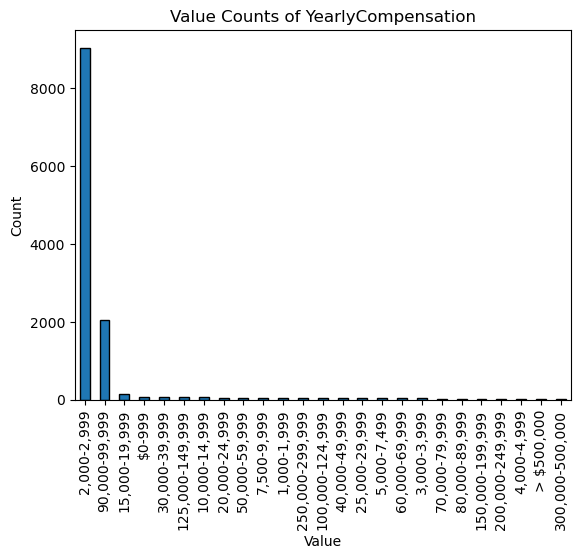

In [ ]:
df['YearlyCompensation'].value_counts().plot(kind='bar', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Count')
plt.title(f'Value Counts of YearlyCompensation')
plt.show()

As we can see 'YearlyCompensation' catagorical column is highly imbalanced. Hence, we used Support Vector Classifier (SVC) with 'class_weight="balanced"' to tackle highly imbalanced distribution of salary ranges.

In [31]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [32]:
# Initialize SVC with class_weight='balanced'
model = SVC(class_weight='balanced')
model.fit(X_train, y_train)

SVC(class_weight='balanced')

In [33]:
# Make predictions on the test set
y_pred = model.predict(X_test)

y_test_arr = y_test.to_numpy()

# Evaluate the model
accuracy = accuracy_score(y_test_arr, y_pred)
classification_rep = classification_report(y_test_arr, y_pred)
conf_matrix = confusion_matrix(y_test_arr, y_pred)

print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_rep)

Accuracy: 0.9358333333333333

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2673
           1       1.00      0.99      1.00       633
           2       0.00      0.00      0.00        10
           3       0.00      0.00      0.00        11
           4       0.15      0.29      0.20        17
           5       0.00      0.00      0.00        13
           6       0.19      0.20      0.19        15
           7       0.86      0.55      0.67        22
           8       0.91      0.60      0.72        50
           9       0.06      0.12      0.08         8
          10       0.12      0.33      0.18         3
          11       0.14      0.18      0.16        11
          12       0.17      0.12      0.14         8
          13       0.08      0.12      0.10         8
          14       0.85      0.73      0.79        15
          15       0.33      0.17      0.22        12
          16       0.11    

<Figure size 1000x1000 with 0 Axes>

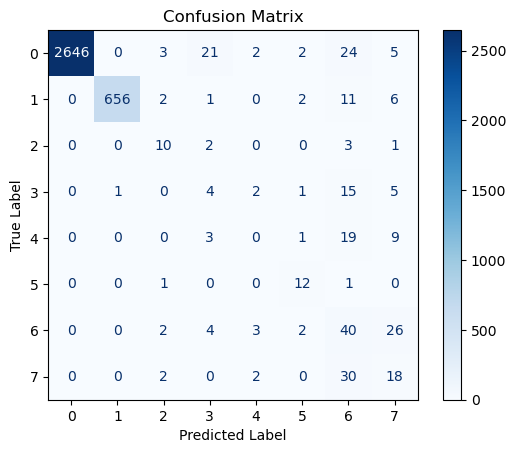

In [ ]:
fig = plt.figure()
fig.set_size_inches(5,5)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap=plt.cm.Blues)  # Choose a color map (optional)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

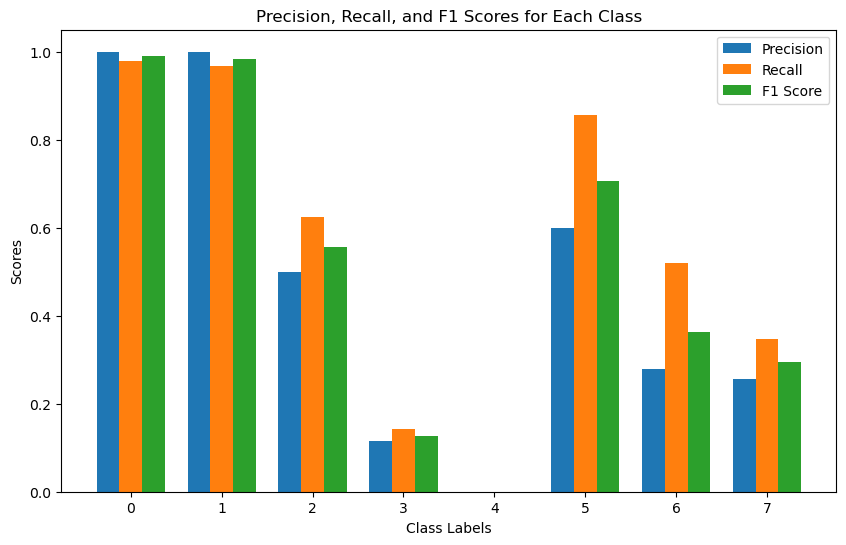

In [ ]:
from sklearn.metrics import precision_recall_fscore_support

# Calculate metrics for each class
precision, recall, f1, _ = precision_recall_fscore_support(y_test_arr, y_pred, average=None)

# Plotting
labels = np.unique(y_test_arr)
x = np.arange(len(labels))
width = 0.25

plt.figure(figsize=(10, 6))
plt.bar(x - width, precision, width, label='Precision')
plt.bar(x, recall, width, label='Recall')
plt.bar(x + width, f1, width, label='F1 Score')

plt.xlabel('Class Labels')
plt.ylabel('Scores')
plt.title('Precision, Recall, and F1 Scores for Each Class')
plt.xticks(x, labels)
plt.legend()
plt.show()

#### Conclusion
<b>Justification for using SVC</b>

SVC (Support vector classifier) is a robust classifier that is well-suited for high-dimensional data and can effectively handle complex boundaries between classes. Since we are using many diverse features, including education level, job title, and company size, etc which may interact in non-linear ways to determine YearlyCompensation.

<b>Tuning the model</b>

Since our output column YearlyCompensation was highly imbalanced, where certain salary ranges are far more common than others, we used class_weight='balanced' in SVC to address this skew. The balanced parameter adjusts the weights inversely to class frequencies, ensuring that the model gives more importance to underrepresented salary categories.

<b>Effectiveness</b>
1. Confusion matrix analysis<br>

The confusion matrix shows that the SVC model is highly effective for classes with larger sample sizes (e.g., label 0 with 2646 correct predictions). However, it struggles with some of the less frequent classes, as indicated by the non-diagonal entries. This may suggest that the SVC model needs more data to handle less frequent categories.

2. Classification metrics<br>

The SVC model demonstrates high precision and recall for major classes (e.g., class 0 and 1), indicating it’s effective in identifying these categories. The lower F1-scores in certain classes reveal areas where the model could benefit from additional data. 

### Hypothesis 2 Solution
Learning from online platforms helps professionals gain more Machine Learning experience in their respective job titles. This occurs because online platforms supplements formal education by providing more up-to-date knowledge and more practical experience.

#### Preproceessing dataset

In [41]:
# Selecting relevant features
# Assuming 'MLExperienceYears' is the target variable and 'CoursesCoursera', 'Education', 'JobTitle' are relevant 
# Modify these column names based on your actual data
features = ['CoursesCoursera', 'Education', 'JobTitle']  # Add or modify columns based on available relevant features
X = df[features]
y = df['MLExperienceYears']  # Target variable

# Preprocessing - converting categorical variables into dummy/indicator variables
X = pd.get_dummies(X, columns=features, drop_first=True)
# y = pd.get_dummies(y, columns=['MLExperienceYears'], drop_first=True)

In [42]:
X.head()

,Education_Doctoral degree,Education_I prefer not to answer,Education_Master’s degree,Education_No formal education past high school,Education_Professional degree,Education_Some college/university study without earning a bachelor’s degree,JobTitle_\tLicensed Vocational Nurse,JobTitle_\tMerchandiser Drop & Go,JobTitle_\tPublic Figure Protection / Executive Protection Team Lead,JobTitle_\tSupervisor Clinic Operations,...,JobTitle_Community Director,JobTitle_Community Director - EX,JobTitle_Community Education Specialist,JobTitle_Community Engagement Associate,JobTitle_Community Engagement Coordinator,"JobTitle_Community Engagement Coordinator, OSH - 23333",JobTitle_Community Engagement Manager,JobTitle_Community Engagement and Facilitation - Managing Consultant,JobTitle_Community Expert,JobTitle_Community Health Educator (RN preferred)
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [43]:
i = 0
experience_mapping = {}
y.loc[y == 0] = '< 1 years'

for k in y.unique():
    experience_mapping[k] = i
    i+=1

y = y.map(experience_mapping)

/var/folders/kl/11gkxl5x49l9sffk443vsksh0000gq/T/ipykernel_32885/2021710490.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.loc[y == 0] = '< 1 years'


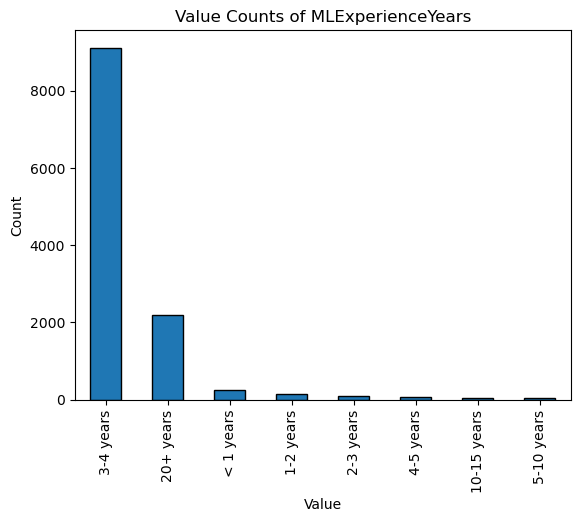

In [44]:
df['MLExperienceYears'].value_counts().plot(kind='bar', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Count')
plt.title(f'Value Counts of MLExperienceYears')
plt.show()

As we can see 'MLExperienceYears' catagorical column is highly imbalanced. Hence, we used Random Forest Classifier with 'class_weight="balanced"' to tackle highly imbalanced distribution of experience ranges.

In [45]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [46]:
X_train.head()

,Education_Doctoral degree,Education_I prefer not to answer,Education_Master’s degree,Education_No formal education past high school,Education_Professional degree,Education_Some college/university study without earning a bachelor’s degree,JobTitle_\tLicensed Vocational Nurse,JobTitle_\tMerchandiser Drop & Go,JobTitle_\tPublic Figure Protection / Executive Protection Team Lead,JobTitle_\tSupervisor Clinic Operations,...,JobTitle_Community Director,JobTitle_Community Director - EX,JobTitle_Community Education Specialist,JobTitle_Community Engagement Associate,JobTitle_Community Engagement Coordinator,"JobTitle_Community Engagement Coordinator, OSH - 23333",JobTitle_Community Engagement Manager,JobTitle_Community Engagement and Facilitation - Managing Consultant,JobTitle_Community Expert,JobTitle_Community Health Educator (RN preferred)
7729,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3546,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3527,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10159,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6959,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


#### Model Initialization

In [47]:
# Initialize the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

# Train the model
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

#### Measuring model performance

In [48]:
# Make predictions on the test set
y_pred = model.predict(X_test)

y_test_arr = y_test.to_numpy()

# Evaluate the model
accuracy = accuracy_score(y_test_arr, y_pred)
classification_rep = classification_report(y_test_arr, y_pred)
conf_matrix = confusion_matrix(y_test_arr, y_pred)

print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_rep)

Accuracy: 0.9405555555555556

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99      2703
           1       1.00      0.97      0.98       678
           2       0.50      0.62      0.56        16
           3       0.11      0.14      0.13        28
           4       0.00      0.00      0.00        32
           5       0.60      0.86      0.71        14
           6       0.28      0.52      0.36        77
           7       0.26      0.35      0.30        52

    accuracy                           0.94      3600
   macro avg       0.47      0.55      0.50      3600
weighted avg       0.95      0.94      0.95      3600



<Figure size 500x500 with 0 Axes>

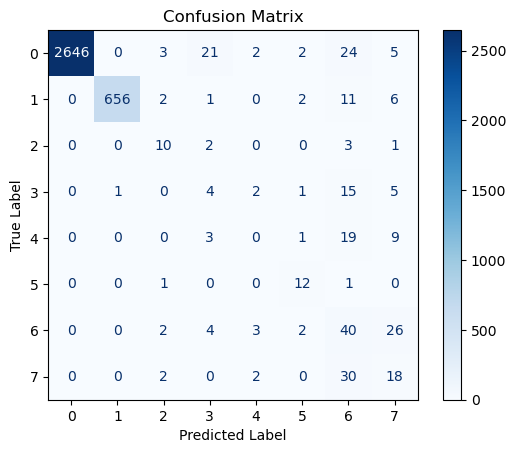

In [49]:
fig = plt.figure()
fig.set_size_inches(5,5)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap=plt.cm.Blues)  # Choose a color map (optional)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

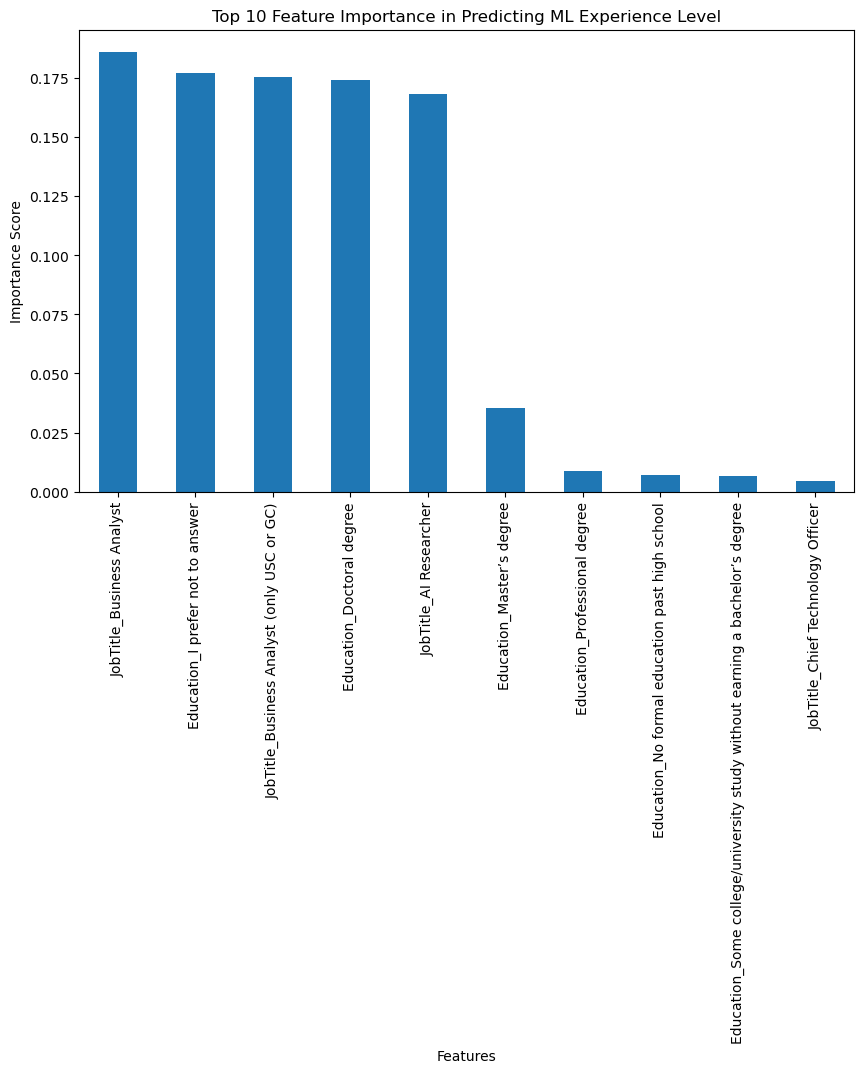

In [53]:
importances = model.feature_importances_
feature_names = X_train.columns
feature_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)
top_features = feature_importances.head(10)


# Plot feature importances
plt.figure(figsize=(10, 6))
top_features.plot(kind='bar')
plt.title("Top 10 Feature Importance in Predicting ML Experience Level")
plt.ylabel("Importance Score")
plt.xlabel("Features")
plt.show()

#### Conclusion
<b>Justification for using RFC</b>

Random Forest Classifier (RFC) can effectively manage complex relationships and non-linear boundaries between features, which is useful for diverse feature like job title, education, course completions. Since RFC is a ensemble of decision trees, it is robust and avoid overfitting to dataset. Random Forest provides feature importance scores, allowing us to see which factors (e.g., online courses, years of experience, job title) are most influential in determining machine learning experience years.

<b>Tuning the model</b>

Since our output column MLExperienceYears was highly imbalanced, where certain experience ranges are far more common than others, we used class_weight='balanced' in RFC to address this skew. The balanced parameter adjusts the weights inversely to class frequencies, ensuring that the model gives more importance to underrepresented salary categories.

<b>Effectiveness</b>
1. Confusion matrix analysis<br>

The confusion matrix shows that the Random Forest model accurately predicts experience levels for professionals with substantial ML experience, with high diagonal values for those categories. This supports the hypothesis by demonstrating that individuals with online learning credentials tend to have measurable experience in ML roles.

2. Feature importance metric<br>

The feature importance plot highlights that education specially doctorate level and job roles with ML involvement are significant predictors of experience levels. This aligns with our hypothesis that online learning plays a key role in professional development for ML roles

## Question 2 Solution
How does geographic location affect job opportunities, and should relocation be considered for career growth?

### Hypothesis Solution
Regions with higher concentrations of tech and finance sectors offer significantly higher median salaries and more job opportunities, making relocation a good strategy for career growth.

In [59]:
# Select features for clustering
features = ['SalaryMedian', 'Industry', 'Location', 'YearlyCompensation']
X = df[features]
X = pd.get_dummies(X, columns=features, drop_first=True)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [76]:
# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df_new = df.copy()
df_new['Cluster'] = kmeans.fit_predict(X_scaled)

In [77]:
df_new = df_new[:50]

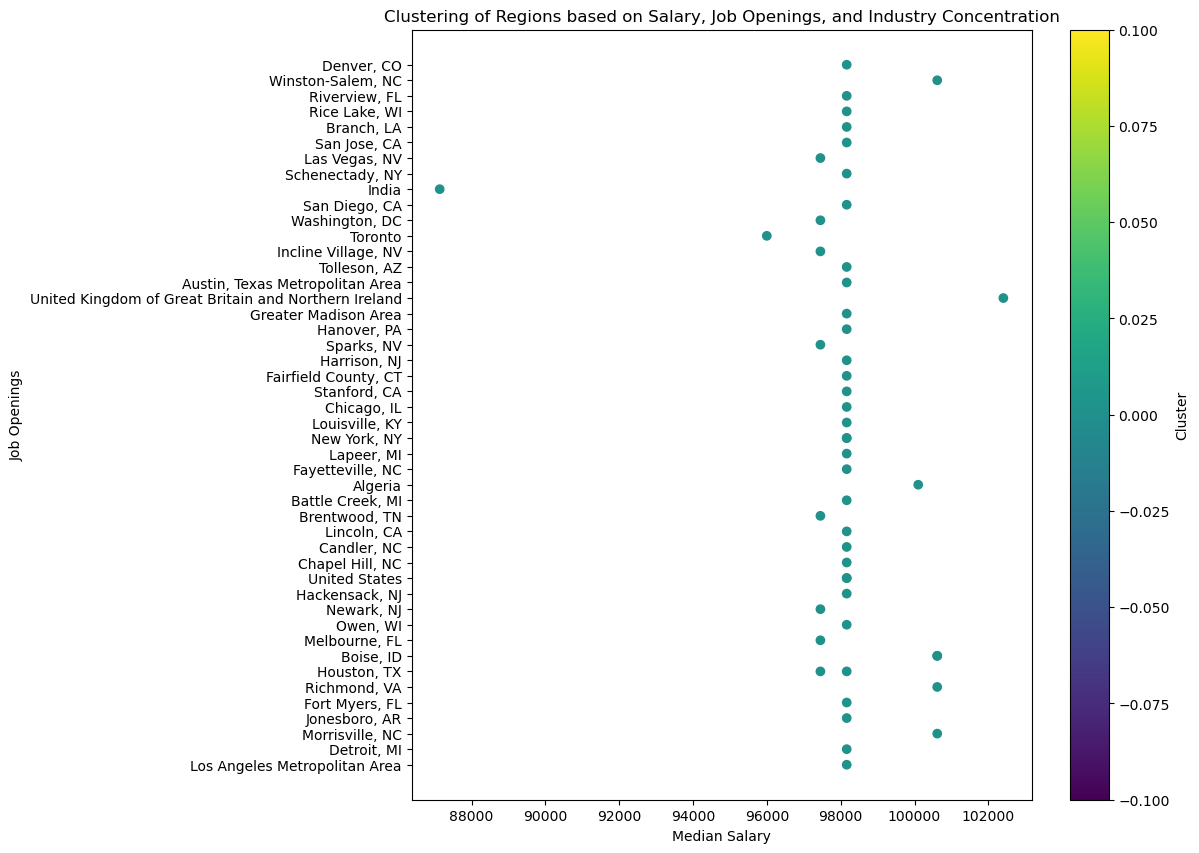

In [78]:
# Visualize the clusters
plt.figure(figsize=(10, 10))
plt.scatter(df_new['SalaryMedian'],df_new['Location'] , c=df_new['Cluster'], cmap='viridis', marker='o')
plt.xlabel("Median Salary")
plt.ylabel("Job Openings")
plt.title("Clustering of Regions based on Salary, Job Openings, and Industry Concentration")
plt.colorbar(label='Cluster')
plt.show()

# Display the DataFrame with clusters
# print(df_new[['Region', 'Salaries.Median', 'Views', 'Industry', 'Cluster']])

#### Conclusion
<b>Justification for using KMeans</b>

KMeans is an effective algorithm for clustering regions because it groups data points based on feature similarity. This approach helps identify clusters of regions with distinct job market profiles, such as high-paying tech hubs or regions with abundant job openings but lower median salaries


<b>Effectiveness</b>
1. Clustering analysis<br>

The clusters identified by KMeans reveal patterns in job opportunities and salaries. For instance, some clusters represent regions with high median and maximum salaries, indicating high job competition or concentration in tech/finance sectors. Others may reflect regions with high job openings but lower salaries, which could suggest emerging or lower-cost job markets.
